Pokemon Battle Winner Predictor
Datasets
combats.csv (train data) = https://raw.githubusercontent.com/saurabhcharde/Pokemon_Battle_Winner_Prediction_using_ML/master/datasets/combats.csv

pokemon_data.csv (features) = https://raw.githubusercontent.com/saurabhcharde/Pokemon_Battle_Winner_Prediction_using_ML/master/datasets/pokemons_data.csv

tests.csv (testing data) = https://raw.githubusercontent.com/saurabhcharde/Pokemon_Battle_Winner_Prediction_using_ML/master/datasets/tests.csv

## Importing data

In [1]:
import numpy as np
import pandas as pd

In [2]:
pokemon=pd.read_csv("https://raw.githubusercontent.com/saurabhcharde/Pokemon_Battle_Winner_Prediction_using_ML/master/datasets/pokemons_data.csv",index_col=0)
combat=pd.read_csv("https://raw.githubusercontent.com/saurabhcharde/Pokemon_Battle_Winner_Prediction_using_ML/master/datasets/combats.csv")

In [3]:
pokemon.head()

,Name,Hit Points,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
#,,,,,,,,
1,Bulbasaur,45,49,49,65,65,45,0
2,Ivysaur,60,62,63,80,80,60,0
3,Venusaur,80,82,83,100,100,80,0
4,Mega Venusaur,80,100,123,122,120,80,0
5,Charmander,39,52,43,60,50,65,0


[735, 65]


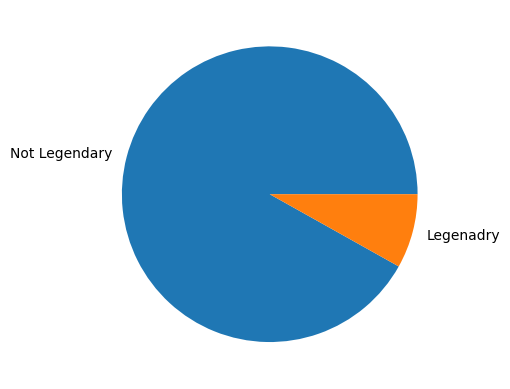

In [4]:
import matplotlib.pyplot as plt
y = list(pokemon['Legendary'].value_counts())
print(y)
mylabels = ["Not Legendary", "Legenadry"]
plt.pie(y, labels = mylabels)
plt.show()

## Data Preprocessing

In [5]:
#Replacing with names for better understanding
cols = ["First_pokemon","Second_pokemon","Winner"]
new_combat=combat[cols].replace(pokemon.Name)
new_combat.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


In [6]:
new_combat.isnull().sum()

First_pokemon     56
Second_pokemon    52
Winner            85
dtype: int64

In [7]:
#If first pokemon is winner then label it as 0, otherwise second pokemon is winner label it as 1
combat.Winner[combat.Winner == combat.First_pokemon] = 0
combat.Winner[combat.Winner == combat.Second_pokemon] = 1
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [8]:
combat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


## Normalizing and adding features

In [9]:
def normalization(data_df):
    stats=["Hit Points","Attack","Defense","Sp. Atk","Sp. Def","Speed","Legendary"]
    stats_df=pokemon[stats].T.to_dict("list") #combining statistics of pokemons from pokemon dataset
    one=data_df.First_pokemon.map(stats_df)
    #stats of first pokemon of combat
    print(one.loc[0], len(one))
    two=data_df.Second_pokemon.map(stats_df)
    #stats of second pokemon of combat
    print(two.loc[0], len(two))
    temp_list=[]
    for i in range(len(one)):
        temp_list.append(np.array(one[i])-np.array(two[i])) #computing difference in statistics of battling pokemons
    # print(temp_list)
    training_set = pd.DataFrame(temp_list, columns=stats)
    for c in stats:
        description=training_set[c].describe()
        # print(description)
        #min-max normalisation
        training_set[c]=(training_set[c]-description['min'])/(description['max']-description['min'])
    return training_set

In [10]:
train=normalization(combat)
train = pd.concat([train,combat.Winner], axis=1)
train.head()

[50, 64, 50, 45, 50, 41, 0] 50000
[70, 70, 40, 60, 40, 60, 0] 50000


,Hit Points,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Winner
0,0.455556,0.468571,0.517241,0.450425,0.527578,0.450746,0.5,1
1,0.500000,0.374286,0.452874,0.543909,0.597122,0.507463,0.5,1
2,0.455556,0.385714,0.517241,0.365439,0.527578,0.507463,0.5,1
3,0.417778,0.257143,0.379310,0.521246,0.383693,0.423881,0.5,1
4,0.611111,0.628571,0.252874,0.790368,0.119904,0.656716,0.5,0


## Train-Test Split

In [11]:
features=train.drop("Winner",axis=1)
label=train["Winner"]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=42)

In [13]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

37500
12500
37500
12500


## Training the modal

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(x_train, y_train)
pred = model.predict(x_test)
print('Accuracy of model: ', accuracy_score(pred, y_test)*100)

Accuracy of model:  95.08


## Testing the Modal

In [15]:
test=pd.read_csv('https://raw.githubusercontent.com/saurabhcharde/Pokemon_Battle_Winner_Prediction_using_ML/master/datasets/tests.csv')
test.head()


,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [16]:
#normalising the test data and predicting
test2=normalization(test)
predictions=model.predict(test2)
test["Winner"]=[test["First_pokemon"][i] if predictions[i]==0 else test["Second_pokemon"][i] for i in range(len(predictions))]

[80, 92, 65, 65, 80, 68, 0] 10000
[90, 55, 75, 60, 75, 30, 0] 10000


In [17]:
test.head()

,First_pokemon,Second_pokemon,Winner
0,129,117,129
1,660,211,211
2,706,115,706
3,195,618,618
4,27,656,27


In [18]:
#gettting names of pokemons
cols = ["First_pokemon","Second_pokemon","Winner"]
test_name=test[cols].replace(pokemon.Name)
test_name.head()

,First_pokemon,Second_pokemon,Winner
0,Seaking,Lickitung,Seaking
1,Ferrothorn,Quagsire,Quagsire
2,Thundurus Therian Forme,Hitmonlee,Thundurus Therian Forme
3,Flaaffy,Maractus,Maractus
4,Spearow,Alomomola,Spearow


## Making the predictor

In [19]:
def predictor():
  first_pokemon = input("Enter first pokemon: ")
  second_pokemon = input("Enter second pokemon: ")
  df = pd.DataFrame({"First_pokemon": [first_pokemon.title()], "Second_pokemon": [second_pokemon.title()]})
  first_dex = pokemon[pokemon['Name'] == first_pokemon.title()].index
  second_dex = pokemon[pokemon['Name'] == second_pokemon.title()].index
  df2 = pd.DataFrame({"First_pokemon": [first_dex.tolist()[0]], "Second_pokemon": [second_dex.tolist()[0]]})
  # return df2
  # def mapping(df):
  stats=["Hit Points","Attack","Defense","Sp. Atk","Sp. Def","Speed","Legendary"]
  stats_df=pokemon[stats].T.to_dict("list")
  one=df2.First_pokemon.map(stats_df)
  # print(one, len(one))
  two=df2.Second_pokemon.map(stats_df)
  # print(two, len(two))

  temp_list=[]
    # for i in range(len(one)):
  temp_list.append(np.array(one[0])-np.array(two[0]))
  # print(temp_list)
  new_test = pd.DataFrame(temp_list, columns=stats)
  # return new_test
  winner_pokedex=model.predict(new_test)
  df2["Winner"]=[df2["First_pokemon"][0] if winner_pokedex==0 else df2["Second_pokemon"][0]]
  stat_plot(stats,one[0],two[0])
  return df2

In [20]:
def poke_name(data):
  cols = ["First_pokemon","Second_pokemon","Winner"]
  test_name=data[cols].replace(pokemon.Name)
  # test_name.head()
  return test_name

In [21]:
def stat_plot(name, one, two ):
  import matplotlib.pyplot as plt

  # # set height of bar
  poke_one = one
  poke_two = two

  # Set the figure size
  plt.rcParams["figure.figsize"] = [7.0, 3.50]
  plt.rcParams["figure.autolayout"] = True
   # Bar's width
  width = 0.4

  # Array for horizontal bar's position
  br = np.arange(len(poke_one))

  fig, ax = plt.subplots()

  # Horizontal bar plot
  ax.barh(br +width,poke_one, width, color='orange', label='First Pokemon')
  ax.barh(br, poke_two, width, color='green', label='Second Pokemon')


  # Set Y-axis ticks and ticklabels
  ax.set(yticks = br + width, yticklabels=name,
  ylim=[2*width - 1, len(br)])
  plt.ylabel("Skills",fontweight ='bold', fontsize = 15)

  # Legend at the upper right corner
  ax.legend(loc='upper right')
  plt.show()

******************************************* 

Welcome to Pokemon Battle predictor 
 

Enter y: to see who wins the battle or enter n: to exit 	y
Enter first pokemon: seaking
Enter second pokemon: pikachu


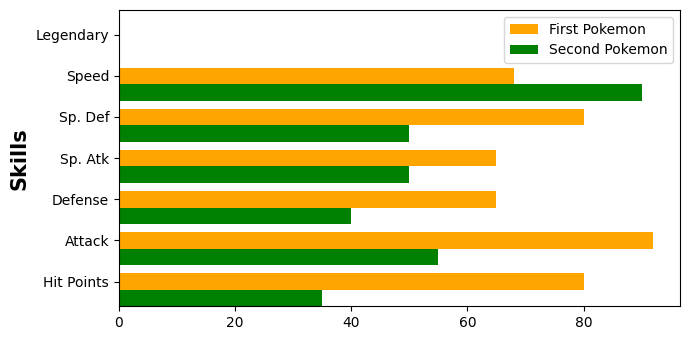

  First_pokemon Second_pokemon
0       Seaking        Pikachu
The Winner is : Seaking 

******************************************* 

Enter y: to see who wins the battle or enter n: to exit 	y
Enter first pokemon: omastar
Enter second pokemon: maractus


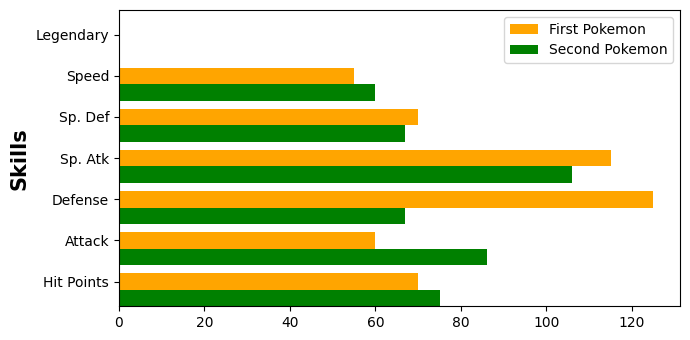

  First_pokemon Second_pokemon
0       Omastar       Maractus
The Winner is : Maractus 

******************************************* 

Enter y: to see who wins the battle or enter n: to exit 	n


In [23]:
print("******************************************* \n")
print("Welcome to Pokemon Battle predictor \n \n")
i=input("Enter y: to see who wins the battle or enter n: to exit \t")
while((i =='y') or ( i=='Y')):
  data=predictor()
  win_data=poke_name(data)
  print(win_data.iloc[:,0:2])
  print("The Winner is : {} \n".format(win_data.iloc[0,2]))
  print("******************************************* \n")
  i=input("Enter y: to see who wins the battle or enter n: to exit \t")